# Final Submission

## Importing needed Libraries

In [262]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, glob

## Functions Needed

### Outlier Remover Function

In [263]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

### Line Chart

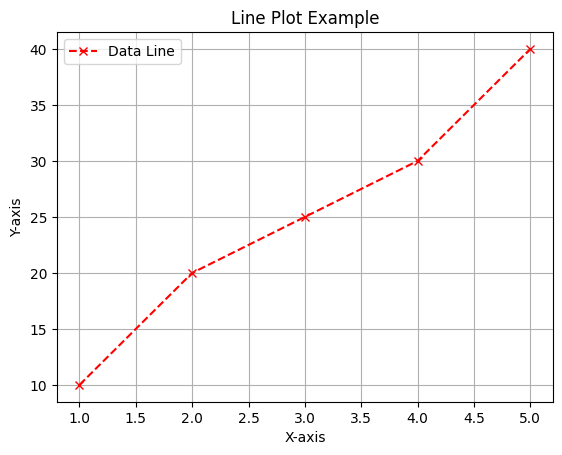

In [264]:
def Line_Plot(x, y, title ="", label ="", xlabel ="", ylabel ="",color = 'b', linestyle = '-', marker = 'o'):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.plot(x, y,color=color, linestyle=linestyle,marker=marker,label = label)
    plt.legend()
    plt.grid()
    plt.show()
Line_Plot([1,2,3,4,5],[10,20,25,30,40], title="Line Plot Example", xlabel="X-axis", ylabel="Y-axis", color='r', linestyle='--', marker='x', label='Data Line')

### Bar Plot

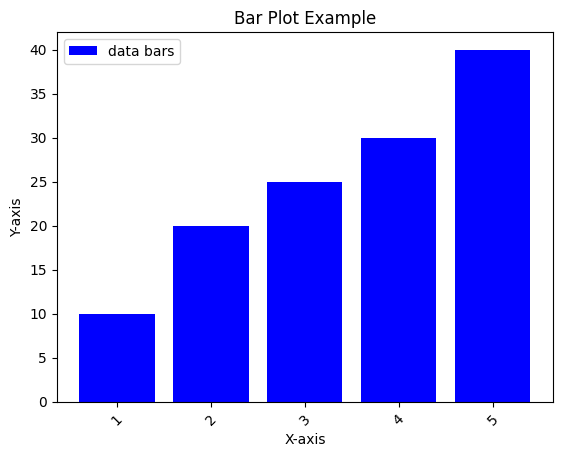

In [265]:
def Bar_Plot(x, y, title ="", label ="", xlabel ="", ylabel ="",color = 'b', linestyle = '-', xticks_rotation = 0):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.bar(x, y,color=color, linestyle=linestyle,label = label)
    plt.xticks(rotation=xticks_rotation)
    #plt.figsize=(15,6)
    plt.legend()
    plt.show()
Bar_Plot([1,2,3,4,5],[10,20,25,30,40], title="Bar Plot Example", xlabel="X-axis",
         ylabel="Y-axis", color='b', linestyle='--', label='data bars', xticks_rotation=45)

### Pie Chart

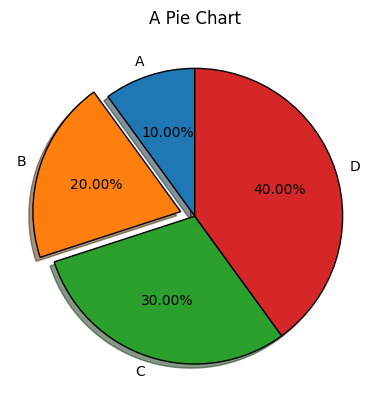

In [266]:
def Pie_Chart(data,labels=None, startangle=90, explode=None, shadow=True, autopct="%.2f%%", wedgeprops = {'edgecolor': 'black'} , title ="A Pie Chart"): 
    plt.pie(data, labels=labels,shadow=shadow,startangle=startangle,autopct=autopct,wedgeprops = wedgeprops,explode=explode)
    plt.title('A Pie Chart');
    plt.show()
Pie_Chart([10,20,30,40], labels=['A','B','C','D'], explode=[0,0.1,0,0], title="Sample Pie Chart")

### Histogram

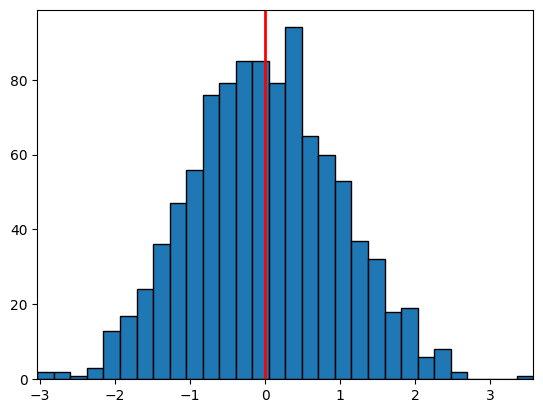

In [267]:
def Histogram_Chart(data, bins, edgecolor='black', title=None, xlabel=None, ylabel=None, mean = True, mean_color='red', mean_linewidth=2, xlimMinPerc= 0, xlimMaxPerc= 100):
    mean1 = np.mean(data)
    plt.hist(data,bins=bins,edgecolor=edgecolor)
    plt.axvline(mean1, color = mean_color, linewidth = mean_linewidth, label=f'Mean: {mean1:.2f}')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xlim(np.percentile(data, xlimMinPerc), np.percentile(data, xlimMaxPerc))
    plt.show()
Histogram_Chart(np.random.randn(1000), bins=30)

### Scatter Plot

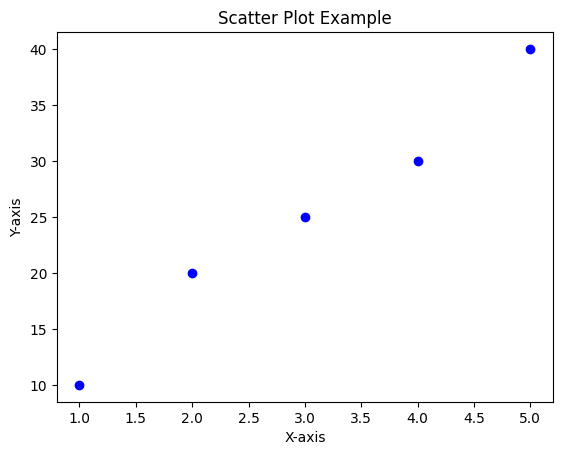

In [268]:
def Scatter_Plot(x, y, title ="", xlabel ="", ylabel ="" , color='b', marker='o'):
    plt.scatter(x, y, color=color, marker=marker)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

Scatter_Plot([1,2,3,4,5],[10,20,25,30,40], title="Scatter Plot Example", xlabel="X-axis", ylabel="Y-axis")

## Mexico City Real Estate Data Preparation

### 1- Import Data/Read Data

In [269]:
data = pd.read_csv("mexico-city-real-estate-1.csv")
data.head()

,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
0,sell,apartment,|Miguel Hidalgo|Distrito Federal|México|,"23.634501,-102.552788",5500000.0,MXN,5450245.50,289775.66,NaN,54.0,NaN,101851.851900,NaN,NaN,NaN,http://miguel-hidalgo-df.properati.com.mx/o3zb...
1,sell,house,|Iztapalapa|Distrito Federal|México|,"19.31033,-99.068557",1512000.0,MXN,1498321.97,79661.96,NaN,80.0,NaN,18900.000000,NaN,NaN,NaN,http://iztapalapa.properati.com.mx/q7t0_venta_...
2,sell,apartment,|Tlalpan|Distrito Federal|México|,"19.279771,-99.234597",926667.0,MXN,918284.00,48822.82,NaN,100.0,NaN,9266.670000,NaN,NaN,NaN,http://tlalpan.properati.com.mx/qbi4_venta_dep...
3,sell,apartment,|Miguel Hidalgo|Distrito Federal|México|,"23.634501,-102.552788",6410000.0,MXN,6352013.39,337720.36,NaN,135.0,NaN,47481.481480,NaN,NaN,NaN,http://miguel-hidalgo-df.properati.com.mx/opeq...
4,sell,apartment,|Benito Juárez|Quintana Roo|México|,"21.1902642,-86.8198375",875000.0,USD,16457437.50,875000.00,0.0,263.0,NaN,3326.996198,NaN,NaN,NaN,http://cancun.properati.com.mx/hg4t_venta_depa...


In [270]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4628 entries, 0 to 4627
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   operation                   4628 non-null   object 
 1   property_type               4628 non-null   object 
 2   place_with_parent_names     4628 non-null   object 
 3   lat-lon                     4144 non-null   object 
 4   price                       4538 non-null   float64
 5   currency                    4538 non-null   object 
 6   price_aprox_local_currency  4538 non-null   float64
 7   price_aprox_usd             4538 non-null   float64
 8   surface_total_in_m2         1668 non-null   float64
 9   surface_covered_in_m2       4436 non-null   float64
 10  price_usd_per_m2            1150 non-null   float64
 11  price_per_m2                4249 non-null   float64
 12  floor                       291 non-null    float64
 13  rooms                       136 n

### 2- Subset the data in the CSV file and return only apartments in Mexico City ("Distrito Federal") that cost less than 100_000

In [271]:
distrito_federal_data = data[(data["property_type"] == "apartment") & (data['place_with_parent_names'].str.contains('Distrito Federal', na =False)) & (data['price_aprox_usd'] < 100000)]
print(f"{distrito_federal_data.shape[0]} apartments found in Distrito Federal with price less than 100,000 USD.")
distrito_federal_data.head()

1405 apartments found in Distrito Federal with price less than 100,000 USD.


,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
2,sell,apartment,|Tlalpan|Distrito Federal|México|,"19.279771,-99.234597",926667.0,MXN,918284.00,48822.82,NaN,100.0,NaN,9266.67000,NaN,NaN,NaN,http://tlalpan.properati.com.mx/qbi4_venta_dep...
11,sell,apartment,|Benito Juárez|Distrito Federal|México|,"23.634501,-102.552788",1784569.0,MXN,1768425.20,94022.66,NaN,57.0,NaN,31308.22807,NaN,NaN,NaN,http://benito-juarez.properati.com.mx/pdji_ven...
14,sell,apartment,|Benito Juárez|Distrito Federal|México|,"19.36269,-99.150565",1260000.0,MXN,1248601.52,66384.96,NaN,103.0,NaN,12233.00971,NaN,NaN,NaN,http://benito-juarez.properati.com.mx/onph_ven...
20,sell,apartment,|Iztacalco|Distrito Federal|México|,"19.4024128,-99.0953907",1345000.0,MXN,1333148.73,70880.12,56.0,56.0,1265.716429,24017.85714,NaN,NaN,NaN,http://iztacalco.properati.com.mx/r6gm_venta_d...
21,sell,apartment,|Benito Juárez|Distrito Federal|México|,"19.35782,-99.149406",1295000.0,MXN,1283284.95,68228.99,NaN,80.0,NaN,16187.50000,NaN,NaN,NaN,http://benito-juarez.properati.com.mx/qvop_ven...


### 3- Explore --look at the distribution of apartment sizes in our dataset

count      4436.000000
mean        206.896979
std        1778.713741
min           0.000000
25%          67.000000
50%         100.000000
75%         205.000000
max      113100.000000
Name: surface_covered_in_m2, dtype: float64


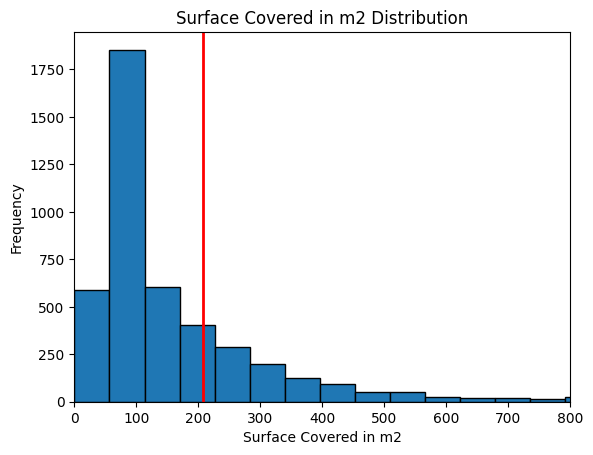

In [272]:
print(data['surface_covered_in_m2'].describe())
#Histogram_Chart(data['surface_covered_in_m2'].dropna(), bins=2000, title='Surface Covered in m2 Distribution',
                #xlabel='Surface Covered in m2', ylabel='Frequency', xlimMinPerc=0, xlimMaxPerc=100)
Histogram_Chart(data['surface_covered_in_m2'].dropna(), bins=2000, title='Surface Covered in m2 Distribution',
                xlabel='Surface Covered in m2', ylabel='Frequency', xlimMinPerc=0.1, xlimMaxPerc=98)

#### **Conclusion**: there are outliers

### 3- Removing Outliers

<Axes: title={'center': 'Before:Box Plot of Surface Covered in m2'}>

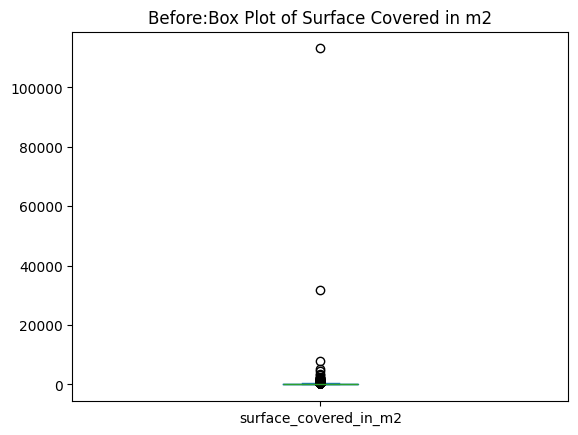

In [273]:
data["surface_covered_in_m2"].plot(kind='box', title='Before:Box Plot of Surface Covered in m2')

<Axes: title={'center': 'After: Box Plot of Surface Covered in m2'}>

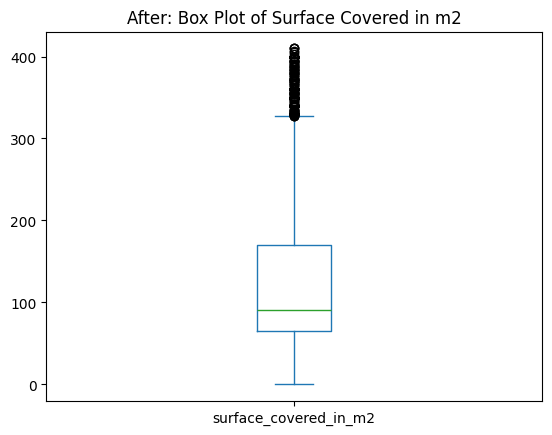

In [274]:
data = remove_outliers_iqr(data, ['surface_covered_in_m2'])
data["surface_covered_in_m2"].plot(
    kind='box', title='After: Box Plot of Surface Covered in m2')

count    4091.000000
mean      126.608653
std        88.764522
min         0.000000
25%        65.000000
50%        91.000000
75%       170.000000
max       410.000000
Name: surface_covered_in_m2, dtype: float64


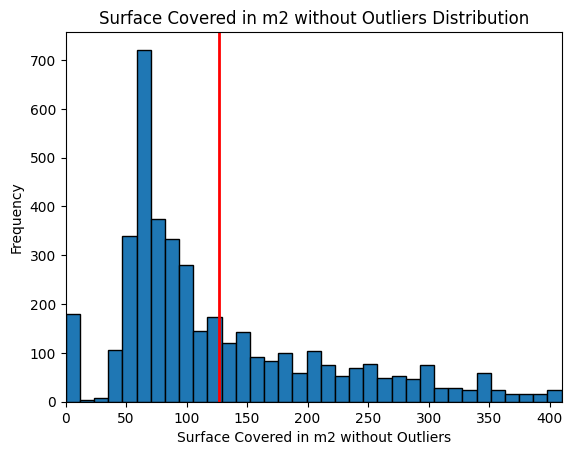

In [275]:
print(data['surface_covered_in_m2'].describe())
Histogram_Chart(data['surface_covered_in_m2'].dropna(), bins=35,
                 title='Surface Covered in m2 without Outliers Distribution',
                xlabel='Surface Covered in m2 without Outliers', ylabel='Frequency')

### 4- Create separate "lat" and "lon" columns

In [276]:
data[['lat', 'lon']] = data['lat-lon'].str.split(',', expand=True).astype(float)
print(data[['lat-lon','lat', 'lon']].head())
data.drop(columns=['lat-lon'], inplace=True)

                  lat-lon        lat         lon
0   23.634501,-102.552788  23.634501 -102.552788
1     19.31033,-99.068557  19.310330  -99.068557
2    19.279771,-99.234597  19.279771  -99.234597
3   23.634501,-102.552788  23.634501 -102.552788
4  21.1902642,-86.8198375  21.190264  -86.819838


### 5- Create a "borough" feature from the "place_with_parent_names" column

In [277]:
data['borough'] = data['place_with_parent_names'].str.split('|').str[1].str.strip()
print(data[['place_with_parent_names', 'borough']].head())
data.drop(columns=['place_with_parent_names'], inplace=True)

                    place_with_parent_names         borough
0  |Miguel Hidalgo|Distrito Federal|México|  Miguel Hidalgo
1      |Iztapalapa|Distrito Federal|México|      Iztapalapa
2         |Tlalpan|Distrito Federal|México|         Tlalpan
3  |Miguel Hidalgo|Distrito Federal|México|  Miguel Hidalgo
4       |Benito Juárez|Quintana Roo|México|   Benito Juárez


### 6- Explore -- Create a plot that show the "borough" feature  in your dataset and represent their price to Know "borough" seem to have higher real estate         prices.

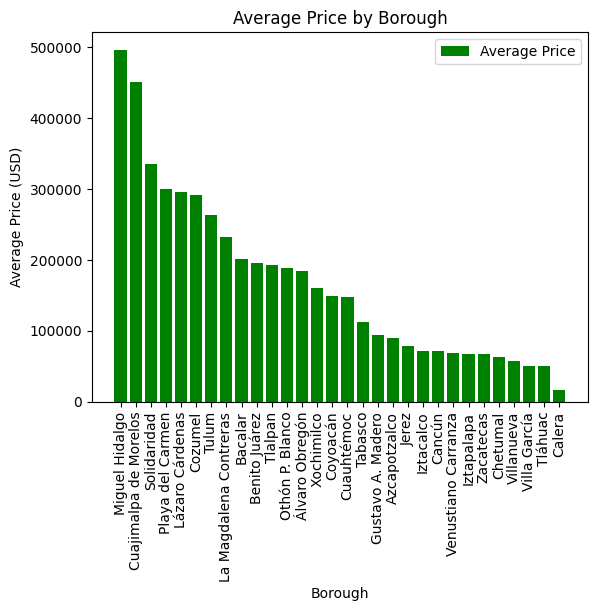

In [278]:
q6= data.groupby(['borough'])['price_aprox_usd'].mean().sort_values(ascending=False)
q6.head()
Bar_Plot(q6.index, q6.values, title='Average Price by Borough', xlabel='Borough',
         ylabel='Average Price (USD)', color='green', label='Average Price', xticks_rotation=90)

### 7- Drop columns containing low- or high-cardinality categorical values and columns that are more than 50% null values

In [279]:
categorial_cols = data.select_dtypes(include=['object']).columns
for col in data.columns:
    missing_percentage = data[col].isnull().mean() * 100
    unique_values = data[col].nunique()
    print(f"Column: {col}, Missing %: {missing_percentage:.2f}%, Unique Values: {unique_values}")
    if missing_percentage > 50:
        data.drop(columns=[col], inplace=True)
    if unique_values == 1:
        data.drop(columns=[col], inplace=True)
    if col in categorial_cols and unique_values > 0.25 * data.shape[0]:
        data.drop(columns=[col], inplace=True)
print(f"Columns after dropping those with >50% missing values:{data.columns.tolist()}")

Column: operation, Missing %: 0.00%, Unique Values: 1
Column: property_type, Missing %: 0.00%, Unique Values: 3
Column: price, Missing %: 2.15%, Unique Values: 1866
Column: currency, Missing %: 2.15%, Unique Values: 2
Column: price_aprox_local_currency, Missing %: 2.15%, Unique Values: 2264
Column: price_aprox_usd, Missing %: 2.15%, Unique Values: 2264
Column: surface_total_in_m2, Missing %: 67.47%, Unique Values: 307
Column: surface_covered_in_m2, Missing %: 0.00%, Unique Values: 350
Column: price_usd_per_m2, Missing %: 79.20%, Unique Values: 819
Column: price_per_m2, Missing %: 4.55%, Unique Values: 3002
Column: floor, Missing %: 95.01%, Unique Values: 4
Column: rooms, Missing %: 99.07%, Unique Values: 6
Column: expenses, Missing %: 100.00%, Unique Values: 0
Column: properati_url, Missing %: 0.00%, Unique Values: 4091
Column: lat, Missing %: 9.88%, Unique Values: 2240
Column: lon, Missing %: 9.88%, Unique Values: 2139
Column: borough, Missing %: 0.00%, Unique Values: 30
Columns after

### 8- Drop any columns that would create issues of multicollinearity

In [280]:
print(f"before: {data['price_aprox_usd'].isna().sum()} nulls")

## filling missing price_aprox_usd using price and currency columns
mask = (data['price_aprox_usd'].isna()) & (data['price'].notna()) & (data['currency'] == 'USD')
data.loc[mask, 'price_aprox_usd'] = data.loc[mask, 'price']
print(f"after: {data['price_aprox_usd'].isna().sum()} nulls")
## We can see we didn't fill any new ones XD

## remove redundant columns
data.drop(columns=['price', 'currency', 'price_aprox_local_currency', 'price_per_m2'], inplace=True)
data.head()

before: 88 nulls
after: 88 nulls


,property_type,price_aprox_usd,surface_covered_in_m2,lat,lon,borough
0,apartment,289775.66,54.0,23.634501,-102.552788,Miguel Hidalgo
1,house,79661.96,80.0,19.310330,-99.068557,Iztapalapa
2,apartment,48822.82,100.0,19.279771,-99.234597,Tlalpan
3,apartment,337720.36,135.0,23.634501,-102.552788,Miguel Hidalgo
4,apartment,875000.00,263.0,21.190264,-86.819838,Benito Juárez


## 9- exploring the relationship between apartment size and price

                       price_aprox_usd  surface_covered_in_m2
price_aprox_usd               1.000000               0.427459
surface_covered_in_m2         0.427459               1.000000


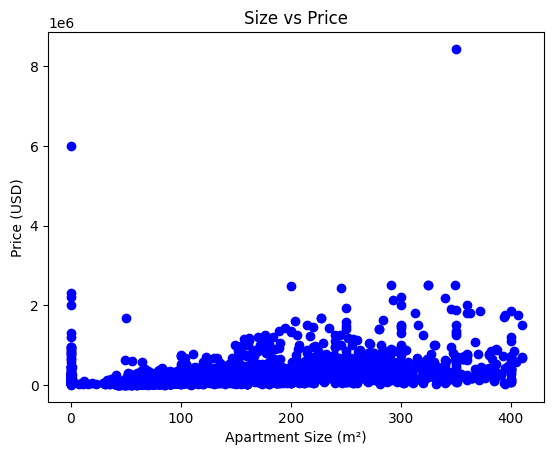

In [281]:
print(data[['price_aprox_usd', 'surface_covered_in_m2']].corr())

Scatter_Plot(data['surface_covered_in_m2'], data['price_aprox_usd'],
             title='Size vs Price', xlabel='Apartment Size (m²)', ylabel='Price (USD)')
### Prices has outliers, we can see that in the scatter plot

#### Removing outliers in prices

count      3673.000000
mean     142116.523414
std      109536.672328
min        6585.810000
25%       55847.670000
50%      106061.540000
75%      196784.010000
max      500521.590000
Name: price_aprox_usd, dtype: float64


<Axes: title={'center': 'Box Plot of price_aprox_usd without Outliers'}>

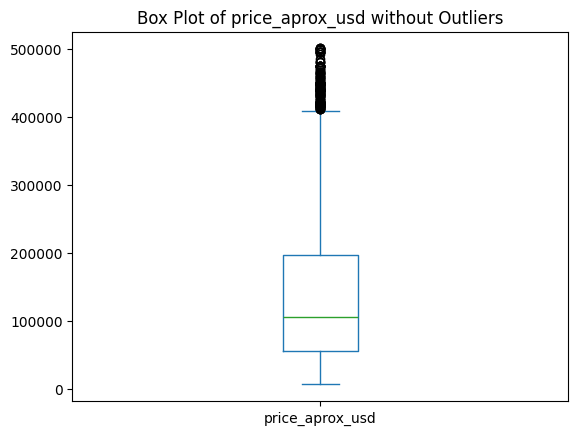

In [282]:
data = remove_outliers_iqr(data, ['price_aprox_usd'])

print(data['price_aprox_usd'].describe())

data["price_aprox_usd"].plot(
    kind='box', title='Box Plot of price_aprox_usd without Outliers')

#### Tryin again after removing outliers

                       price_aprox_usd  surface_covered_in_m2
price_aprox_usd               1.000000               0.509996
surface_covered_in_m2         0.509996               1.000000


<Axes: title={'center': 'Size vs Price'}, xlabel='Apartment Size (m²)', ylabel='Price (USD)'>

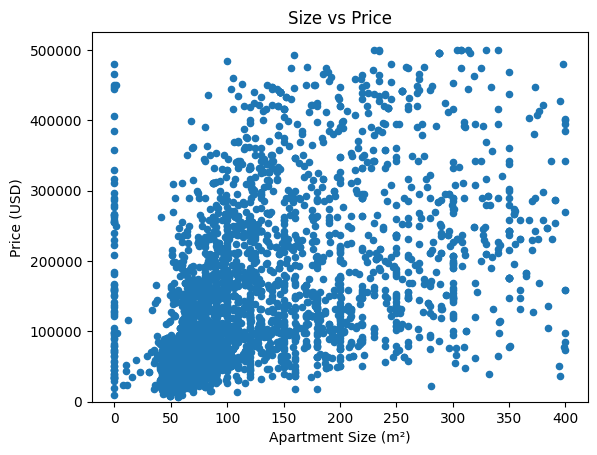

In [283]:
print(data[['price_aprox_usd', 'surface_covered_in_m2']].corr())

data[['price_aprox_usd', 'surface_covered_in_m2']].plot(kind='scatter',
                                                          x='surface_covered_in_m2',
                                                          y='price_aprox_usd',
                                                          title='Size vs Price',
                                                          xlabel='Apartment Size (m²)',
                                                          ylabel='Price (USD)',
                                                          ylim=(0, None)
                                                          )

#### **Conclusion**: The correlation has increased abit and the graph is clearer now showing us amoderate positive correlation when size increase price increase moderately

In [284]:
data.head()

,property_type,price_aprox_usd,surface_covered_in_m2,lat,lon,borough
0,apartment,289775.66,54.0,23.634501,-102.552788,Miguel Hidalgo
1,house,79661.96,80.0,19.310330,-99.068557,Iztapalapa
2,apartment,48822.82,100.0,19.279771,-99.234597,Tlalpan
3,apartment,337720.36,135.0,23.634501,-102.552788,Miguel Hidalgo
5,apartment,232663.51,87.0,19.432657,-99.177444,Miguel Hidalgo


### 10- create a function named wrangle that takes a file path as an argument and returns a DataFrame and automate the data importing and cleaning process

In [285]:
def wrangler(file_path):
    # Load data
    data = pd.read_csv(file_path)

    # Getting categorical columns
    categorical_cols = data.select_dtypes(include=['object']).columns

    # Data Cleaning Steps
    data[['lat', 'lon']] = data['lat-lon'].str.split(',', expand=True).astype(float)
    data.drop(columns=['lat-lon'], inplace=True)

    data['borough'] = data['place_with_parent_names'].str.split('|').str[1].str.strip()
    data.drop(columns=['place_with_parent_names'], inplace=True)

    # Drop columns with >50% missing values or single unique value or high cardinality 
    # more than 25% of total rows
    
    for col in data.columns:
        missing_percentage = data[col].isnull().mean() * 100
        unique_values = data[col].nunique()
        if (missing_percentage > 50) or (unique_values == 1) or (col in categorical_cols and unique_values \
        > 0.25 * data.shape[0]):
            data.drop(columns=[col], inplace=True)
    
    # We know its high cardinality
    #data.drop(columns=["properati_url"], inplace=True)

    # Fill missing price_aprox_usd using price and currency columns
    mask = (data['price_aprox_usd'].isna()) & (data['price'].notna()) & (data['currency'] == 'USD')
    data.loc[mask, 'price_aprox_usd'] = data.loc[mask, 'price']

    # Remove outliers
    data = remove_outliers_iqr(data, ['surface_covered_in_m2', 'price_aprox_usd'])

    # Remove redundant columns
    data.drop(columns=['price', 'currency', 'price_aprox_local_currency', 'price_per_m2'], inplace=True)
    
    return data
final_data = wrangler("mexico-city-real-estate-2.csv")
final_data.head()

,property_type,price_aprox_usd,surface_covered_in_m2,lat,lon,borough
0,apartment,63223.78,88.0,19.516777,-99.160149,Gustavo A. Madero
1,apartment,25289.51,48.0,19.466724,-99.131614,Gustavo A. Madero
2,apartment,240211.43,126.0,19.332280,-99.243934,Álvaro Obregón
3,apartment,200682.34,171.0,21.110577,-86.853786,Benito Juárez
4,apartment,91147.61,100.0,19.393650,-99.147690,Benito Juárez


### 11-Use glob to create the list files It should contain the filenames of all the Mexico City real estate CSVs in the your directory and concat all Files

In [286]:
current_path = os.getcwd()

# Find all Mexico City real estate CSVs in current directory
file_list = glob.glob(os.path.join(current_path, "mexico-city-real-estate-*.csv"))
print("Found files:", file_list)

df_list = [pd.read_csv(file) for file in file_list]

data = pd.concat(df_list, ignore_index=True)
print(data.shape)
data.info()
data.to_csv("mexico-city-real-estate-combined.csv", index=False)


Found files: ['d:\\Big Data NTI\\Python_Final_Submission\\mexico-city-real-estate-1.csv', 'd:\\Big Data NTI\\Python_Final_Submission\\mexico-city-real-estate-2.csv', 'd:\\Big Data NTI\\Python_Final_Submission\\mexico-city-real-estate-3.csv', 'd:\\Big Data NTI\\Python_Final_Submission\\mexico-city-real-estate-4.csv', 'd:\\Big Data NTI\\Python_Final_Submission\\mexico-city-real-estate-5.csv', 'd:\\Big Data NTI\\Python_Final_Submission\\mexico-city-real-estate-combined.csv']
(532220, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532220 entries, 0 to 532219
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   operation                   532220 non-null  object 
 1   property_type               532220 non-null  object 
 2   place_with_parent_names     532220 non-null  object 
 3   lat-lon                     476054 non-null  object 
 4   price                       523135 non-null  f

In [287]:
def main():
    while True:
        file_number = input("Enter the file number to wrangle (1, 2, 3, 4, or 5) or 'q to quit: ")
        
        if file_number.lower() == 'q':
            print(f"\n\nThank you for using the wrangler!")
            break
        elif file_number in ['1', '2', '3', '4', '5']:
            current_path = os.getcwd()
            file_name = f"mexico-city-real-estate-{file_number}.csv"
            file_path = os.path.join(current_path, file_name)
            try:
                wrangled_data = wrangler(file_path)
                print(f"Wrangled data from {file_path}:")
                print(f"{"-"*100}\n{wrangled_data.head()}\n{"-"*100}")
            except FileNotFoundError:
                print(f"{"-" * 100}\nFile {file_path} not found. Please check the file number and try again.\n{"-" * 100}")
        else:
            print(f"{"-" * 100}\nInvalid input. Please enter a valid file number (1-5) or 'q' to quit.\n{"-" * 100}")


In [288]:
if __name__ == "__main__":
    main()

Wrangled data from d:\Big Data NTI\Python_Final_Submission\mexico-city-real-estate-1.csv:
----------------------------------------------------------------------------------------------------
  property_type  price_aprox_usd  surface_covered_in_m2        lat  \
0     apartment        289775.66                   54.0  23.634501   
1         house         79661.96                   80.0  19.310330   
2     apartment         48822.82                  100.0  19.279771   
3     apartment        337720.36                  135.0  23.634501   
5     apartment        232663.51                   87.0  19.432657   

          lon         borough  
0 -102.552788  Miguel Hidalgo  
1  -99.068557      Iztapalapa  
2  -99.234597         Tlalpan  
3 -102.552788  Miguel Hidalgo  
5  -99.177444  Miguel Hidalgo  
----------------------------------------------------------------------------------------------------
Wrangled data from d:\Big Data NTI\Python_Final_Submission\mexico-city-real-estate-2.csv:
-----